In [1]:
# Set the display width of the Jupyter cells to maximum
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using TensorFlow backend.



SharedHits/NormalizedCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8505 entries, 0 to 8504
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 26.4 MB
None

SharedHits/NormalizedCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8505 entries, 0 to 8504
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 26.4 MB
None



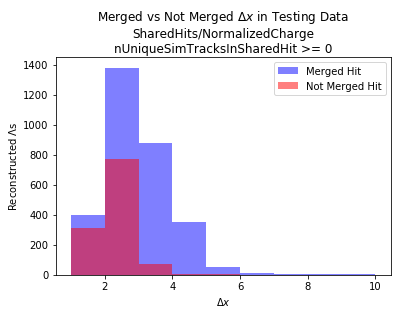

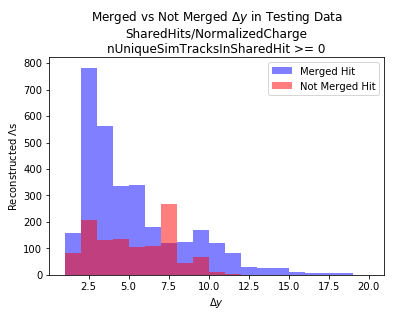


SharedHits/AbsoluteCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8505 entries, 0 to 8504
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 26.4 MB
None

SharedHits/AbsoluteCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8505 entries, 0 to 8504
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 26.4 MB
None



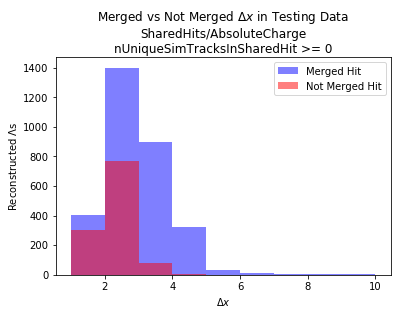

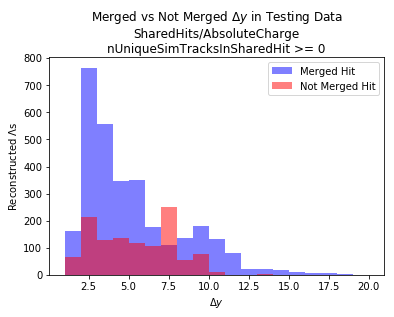


Shared100NonShared/NormalizedCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 12476
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 38.8 MB
None

Shared100NonShared/NormalizedCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10095 entries, 0 to 12475
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 31.4 MB
None



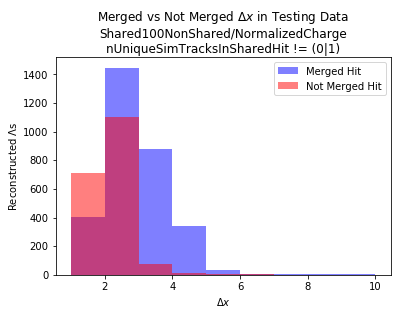

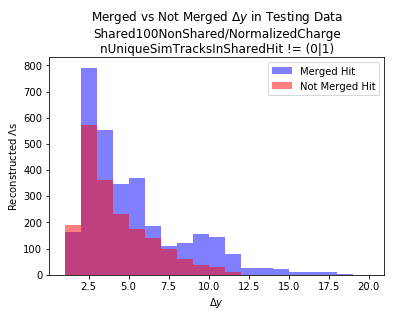


Shared100NonShared/AbsoluteCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 12476
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 38.8 MB
None

Shared100NonShared/AbsoluteCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10095 entries, 0 to 12475
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 31.4 MB
None



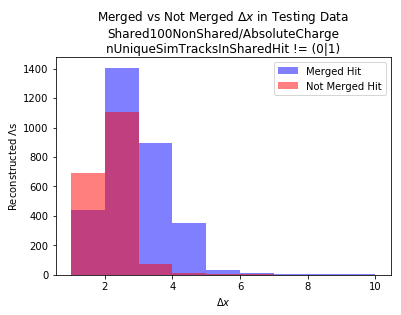

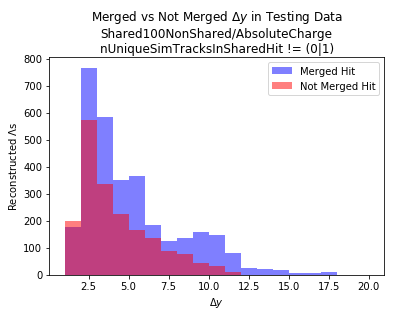


AllHits/NormalizedCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 411064 entries, 0 to 411063
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 1.2 GB
None

AllHits/NormalizedCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404014 entries, 0 to 411063
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 1.2 GB
None



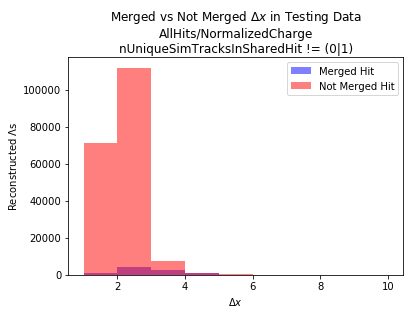

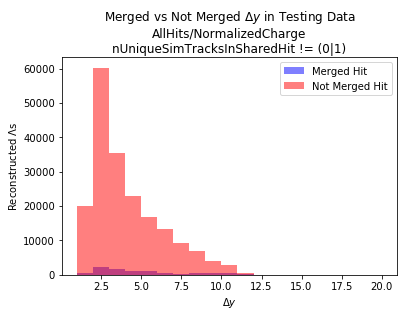


AllHits/AbsoluteCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 411064 entries, 0 to 411063
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 1.2 GB
None

AllHits/AbsoluteCharge
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404014 entries, 0 to 411063
Columns: 407 entries, pixel_78 to pixel_148
dtypes: float64(405), int32(1), int64(1)
memory usage: 1.2 GB
None



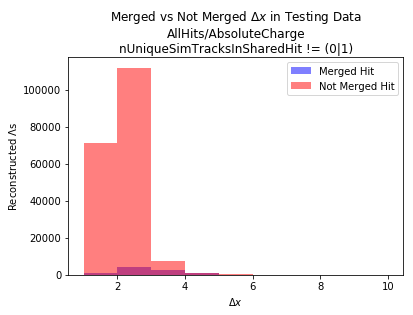

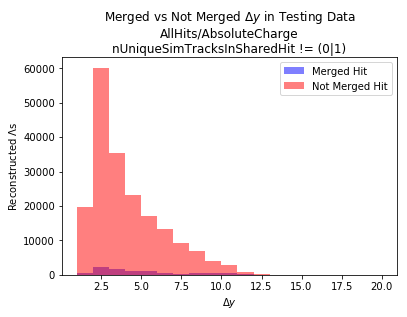

In [2]:
### Loop over 6 data categories and generate the plot for each ###

# Import Libraries
import keras
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from IPython.display import FileLink, FileLinks
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import pylab
from scipy.stats.stats import pearsonr
%matplotlib inline

# File paths
datafilenames = ["SharedHits/NormalizedCharge/output_final.h5","SharedHits/AbsoluteCharge/output_final.h5",
                "Shared100NonShared/NormalizedCharge/output_final.h5","Shared100NonShared/AbsoluteCharge/output_final.h5",
                "AllHits/NormalizedCharge/output_final.h5","AllHits/AbsoluteCharge/output_final.h5"]

# Loop over the data files
for counter,datafilename in enumerate(datafilenames):
    
    # One image has 20x20 pixels = 400 pixels 
    pixels = ["pixel_{0}".format(i) for i in range(20*20)]
    def to_image(df):
        return  np.expand_dims(np.expand_dims(df[pixels], axis=-1).reshape(-1,20,20), axis=-1)
    
    # File paths
    datafilenames = ["SharedHits/NormalizedCharge/output_final.h5","SharedHits/AbsoluteCharge/output_final.h5",
                    "Shared100NonShared/NormalizedCharge/output_final.h5","Shared100NonShared/AbsoluteCharge/output_final.h5",
                    "AllHits/NormalizedCharge/output_final.h5","AllHits/AbsoluteCharge/output_final.h5"]
    
    # Setup different cuts for different data
    if counter == 0 or counter == 1: # Shared Hits
        cuttitle = "nUniqueSimTracksInSharedHit >= 0"
        stringforcut = "(df['nUniqueSimTracksInSharedHit']>=0)"
    if counter == 2 or counter == 3: # Shared100NonShared Hits
        cuttitle = "nUniqueSimTracksInSharedHit != (0|1)"
        stringforcut = '(df["nUniqueSimTracksInSharedHit"]!=0) & (df["nUniqueSimTracksInSharedHit"]!=1)'
    if counter == 4 or counter == 5: # All Hits
        cuttitle = "nUniqueSimTracksInSharedHit != (0|1)"
        stringforcut = '(df["nUniqueSimTracksInSharedHit"]!=0) & (df["nUniqueSimTracksInSharedHit"]!=1)'
        
    # Import the data
    df = pd.read_hdf("/uscms_data/d3/bbonham/TrackerProject/TrackingDstar/LambaAnalyzer/output_of_postprocess/"+datafilename, key="df", mode='r')
    
    # Print info on dataframe
    print ""
    print '\033[1m' + datafilename[:-16] + '\033[0m' # name printed in bold
    print df.info()
    print ""
    
    # Make final cut for signal/background
    df = df[eval(stringforcut)]
    
    # Print info on dataframe
    print '\033[1m' + datafilename[:-16] + '\033[0m' # name printed in bold
    print df.info()
    print ""
    
    # frac=0.5 sets half training and half testing
    df_train=df.sample(frac=0.5)
    df_test=df.drop(df_train.index)
    images_train = to_image(df_train)
    images_test = to_image(df_test)
    
    ### Script for dx, dy, x^RMS, y^RMS ##
    data = df_test
    shareds =  data
    pixelColumns = ["pixel_%i" % x for x in range(400)]
    pixels = shareds[pixelColumns].values
    width = [] # dx
    length = [] # dy
    x_rms = [] 
    y_rms = []

    for row,hit,  in enumerate(pixels):
        x_pos = []
        y_pos = []
        charge = []
        arra = np.zeros((20,20))
        for index,pixel in enumerate(hit):   
            if pixel!=0:
                x_pos.append(index%20)
                y_pos.append(np.floor(index/20))  
                charge.append(pixel)
                arra [19 - int(np.floor(index/20))][int(index%20)]= pixel

        # Evaluating width and height of every event
        charge_in_x = np.sum(arra,axis=0)
        charge_in_y = np.sum(arra,axis=1)
        charge_x_values = np.where(charge_in_x>0)[0]
        charge_y_values = np.where(charge_in_y>0)[0]
        wid = charge_x_values[-1] - charge_x_values[0] + 1
        le = charge_y_values[-1] - charge_y_values[0] + 1
        width.append(wid)
        length.append(le)

        # Evaluating x^RMS, y^RMS of every cluster
        mean_x = 0
        mean_y = 0
        x_ms = 0
        y_ms = 0
        for i in range (0,20):
            mean_x = charge_in_x[i]*(i+1) + mean_x
            mean_y = charge_in_y[i]*(i+1) + mean_y
        for i in range (0,20):
            if charge_in_x[i] > 0:
                x_ms = (mean_x - charge_in_x[i]*(i+1))**2 + x_ms
            if charge_in_y[i] > 0:
                y_ms = (mean_y - charge_in_y[i]*(i+1))**2 + y_ms
        x_rms.append(np.sqrt(x_ms))
        y_rms.append(np.sqrt(y_ms))

    # Adding width and height branch
    data.insert(1, "Length", length)
    data.insert(1, "Width", width)

    # Adding width RMS and height RMS branch
    data.insert(1, "Length RMS", y_rms)
    data.insert(1, "Width RMS", x_rms)
    
    ### Plot ###
    # Setup
    signal = data[(data["nUniqueSimTracksInSharedHit"]>1)]
    background = data[(data["nUniqueSimTracksInSharedHit"]<2)]
    signal_plt_width = signal["Width"]
    background_plt_width = background["Width"]
    signal_plt_height = signal["Length"]
    background_plt_height = background["Length"]
    
    # Plot delta x
    plt.hist(signal_plt_width,  alpha = 0.5, color = 'b', label = 'Merged Hit', range = (1,10), bins = 9)
    plt.hist(background_plt_width, alpha = 0.5, color = 'r', label = 'Not Merged Hit', range = (1,10), bins = 9)
    plt.legend(loc='best')
    plt.title("Merged vs Not Merged $\Delta x$ in Testing Data"+"\n"+datafilename[:-16]+"\n"+cuttitle)
    plt.xlabel('$\Delta x$')
    plt.ylabel('Reconstructed $\Lambda$s')
    plt.savefig('deltax_'+datafilename[:-16].replace("/","_")+".png")
    plt.show()
    
    # Plot delta y
    plt.hist(signal_plt_height, alpha = 0.5, color = 'b', label = 'Merged Hit', range = (1,20), bins = 19)
    plt.hist(background_plt_height, color = 'r', alpha = 0.5, label = 'Not Merged Hit', range = (1,20), bins = 19)
    plt.legend(loc='best')
    plt.title("Merged vs Not Merged $\Delta y$ in Testing Data"+"\n"+datafilename[:-16]+"\n"+cuttitle)
    plt.xlabel('$\Delta y$')
    plt.ylabel('Reconstructed $\Lambda$s')
    plt.savefig('deltay_'+datafilename[:-16].replace("/","_")+".png")
    plt.show()
    
    %reset -f
    # Import Libraries
    import keras
    from keras.layers import Dense, Dropout, Activation
    from keras.callbacks import EarlyStopping
    from keras.callbacks import ModelCheckpoint
    import tensorflow as tf
    import numpy as np
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from IPython.display import FileLink, FileLinks
    import matplotlib.pyplot as plt
    import pandas as pd
    import sys
    import os
    import pylab
    from scipy.stats.stats import pearsonr
    %matplotlib inline